In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
import csv
import copy
import math
import sympy as s
from IPython.display import display, Markdown

#compute z
def compute_z (theta, data):
  z = np.dot(data,np.transpose(theta))
  return z


#compute prediction
def compute_prediction (theta,data):
  z=[]
  for i in range(len(data)):
    z.append(compute_z(theta,data[i]))
  prediction = []
  for i in range(len(z)):
    prediction.append(1.0/(1+np.exp(-z[i])))

  return prediction


# Objective Function
def compute_cost(theta, data, l):
  m = float(len(l))
  prediction = compute_prediction(theta, data)
  prediction=np.array(prediction)
  l=np.array(l)
  
  J = (1/m)*(np.sum(-l*np.log(prediction)-(1-l)*np.log(1-prediction)))
  
  return J

# get theta, theta_history, J_history, accuracy_history
def compute_theta(theta, data, l, alpha, num):
  m = float(len(data))
  data_x=[]
  data_y=[]
  data_z=[]
  data_a=[]
  data_b=[]


  for i in range(int(m)):
    data_x.append(copy.deepcopy(data[i][1]))
    data_y.append(copy.deepcopy(data[i][2]))
    data_z.append(copy.deepcopy(data[i][3]))
    data_a.append(copy.deepcopy(data[i][4]))
    data_b.append(copy.deepcopy(data[i][5]))

    

  J_history=[]
  theta_history=[]
  accuracy_history=[]
  J_history.append(compute_cost(theta,data, l))
  theta_history.append(copy.deepcopy(theta))
  t = 0 
  pd = compute_prediction(theta,data)
  for i in range(len(pd)):
    if pd[i] >= 0.5:
      if l[i]==1:
        t += 1
    else:
      if l[i]==0:
        t += 1
  accuracy_history.append(copy.deepcopy(t))


 
  for i in range(num):
    prediction = compute_prediction(theta,data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l

    t = 0 
    for j in range(len(prediction)):
      if prediction[j] >= 0.5:
        if l[j]==1:
          t += 1
      else:
        if l[j]==0:
          t += 1
    accuracy_history.append(copy.deepcopy(t))
    t = 0
   
    t0 = alpha*(1/m)*np.sum(loss)
    t1 = alpha*(1/m)*np.sum(loss*data_x)
    t2 = alpha*(1/m)*np.sum(loss*data_y)
    t3 = alpha*(1/m)*np.sum(loss*data_z)
    t4 = alpha*(1/m)*np.sum(loss*data_a)
    t5 = alpha*(1/m)*np.sum(loss*data_b)
    
    
    theta[0]-=t0
    theta[1]-=t1
    theta[2]-=t2
    theta[3]-=t3
    theta[4]-=t4
    theta[5]-=t5
    
    J_history.append(compute_cost(theta, data, l))
    theta_history.append(copy.deepcopy(theta))

  return theta, theta_history, J_history ,accuracy_history



data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]



train_data=[]
data_label=[]
temp=[]

for i in range(len(pointX)):
  temp.append(1)
  temp.append(copy.deepcopy(pointX[i]**2))
  temp.append(copy.deepcopy(pointY[i]**2))
  temp.append(copy.deepcopy(pointX[i]*pointY[i]))
  temp.append(copy.deepcopy(pointX[i]))
  temp.append(copy.deepcopy(pointY[i]))
 
  data_label.append(copy.deepcopy(label[i]))
  train_data.append(copy.deepcopy(temp))
  temp.clear()


#theta[0] + theta[1]x^2 + theta[2]y^2 + theta[3]xy + theta[4]x + theta[5]y = 0
theta=[2, -8, -10, -4, 4, 1]
alpha = 0.1
num = 3000

theta, theta_h, cost_h, accuracy_h = compute_theta(theta, train_data, data_label, alpha, num)
accuracy_rate=[]
for i in range(len(accuracy_h)):
  accuracy_rate.append(copy.deepcopy(accuracy_h[i]/len(train_data)))






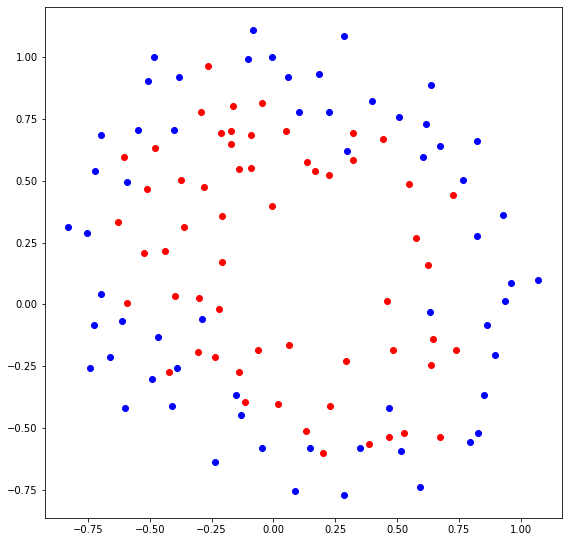

In [85]:
#plot the data

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [75]:
#high dimensional function

s.init_printing()

x, y = symbols('x y', real = True)
t1, t2, t3, t4, t5, t6 = symbols('\theta_{0} \theta_{1} \theta_{2} \theta_{3} \theta_{4} \theta_{5}')

f = t1 + t2*x**2 + t3*y**2 + t4*x*y + t5*x + t6*y

display(Markdown(s.latex(f)))




heta_{0} + heta_{1} x^{2} + heta_{2} y^{2} + heta_{3} x y + heta_{4} x + heta_{5} y

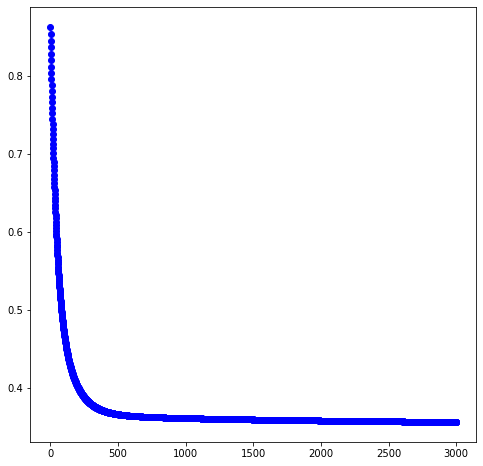

In [86]:
#Plot the training error

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), cost_h, c='blue')
plt.show()


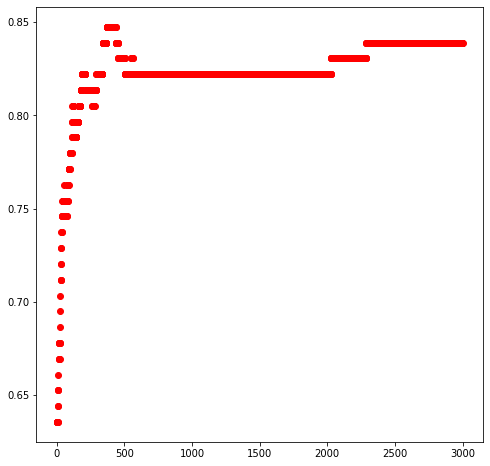

In [97]:
#Plot the training accuracy

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), accuracy_rate, c='red')
plt.show()

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt
